In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

In [3]:
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


In [8]:
DatabaseDF['Section'].unique()

array([10, 16, 24,  1, 35, 32, 28,  9,  2, 27, 12, 23, 18,  4, 36, 30,  8,
       20, 15, 22, 13, 14, 29, 34, 31,  3, 21, 19,  7,  6, 11, 25, 26, 33,
       17,  5])

## Definition

The Solow Model looks at overall economic growth, while factoring different factors. For example, they take into account the population growth, technological growth, etc, that help affect the economic growth of a country. Created by Robert Solow, an economy can grow from capital, labour, ideas and new technology. 

It is a non-linear system that can take into account the production function. You input production functions to understand the rate of growth.


**κ_{t+1} = κ_t + ( 1 - α) ( s - (n+g+δ)κ_t )**


Correlation between the different values of cumulative production will be the rate be plugged into the Solow formula to understand the change of the model. This is because many of the features must be between the value of 0 - 1 and they help establish a relationship between output, capital, and labour so our features can be used to see that relationship. 

In [4]:
spearmancorr = DatabaseDF.corr(method = 'spearman')
spearmancorr # Looking for best relationship

,Unnamed: 0,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,...,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
Unnamed: 0,1.000000,0.077660,0.232800,0.381223,0.006677,-0.049775,0.243052,0.198040,0.127087,0.129392,...,0.385105,-0.044463,-0.118379,0.145759,0.203367,0.178904,-0.575608,0.666886,0.176944,0.184971
Lateral Length,0.077660,1.000000,0.435665,0.018391,0.181624,-0.030477,0.326196,0.307917,0.141420,0.142319,...,0.021630,-0.185652,-0.184828,0.177257,0.405629,0.424934,0.028158,0.872082,0.480787,0.312223
Stages,0.232800,0.435665,1.000000,0.052379,0.162301,0.029076,0.658696,0.630845,0.251405,0.244439,...,0.050454,-0.171085,-0.291524,0.340166,0.908350,0.877969,0.301994,0.229416,1.000000,0.648229
Township,0.381223,0.018391,0.052379,1.000000,-0.018511,0.025329,0.010163,-0.021137,-0.174974,-0.165998,...,0.997491,-0.123387,0.036315,-0.165085,0.104709,0.022196,-0.688001,0.666886,-0.172964,-0.039493
Range,0.006677,0.181624,0.162301,-0.018511,1.000000,-0.020666,0.133176,0.274213,-0.121818,-0.144633,...,-0.014452,-0.983496,-0.020250,-0.157996,0.138849,0.162309,0.449071,0.648886,0.164849,0.167011
Section,-0.049775,-0.030477,0.029076,0.025329,-0.020666,1.000000,0.025029,0.021621,0.018478,0.016098,...,-0.036515,0.017142,-0.017271,0.010521,0.039962,0.009927,0.319731,-0.205196,0.008116,0.032135
"Total Prop, lbs",0.243052,0.326196,0.658696,0.010163,0.133176,0.025029,1.000000,0.856374,0.320731,0.331295,...,0.008453,-0.136473,-0.279404,0.440060,0.529296,0.615773,0.424671,0.564288,-0.151921,0.611360
"Fluid, bbls",0.198040,0.307917,0.630845,-0.021137,0.274213,0.021621,0.856374,1.000000,0.282209,0.291956,...,-0.022095,-0.272063,-0.289765,0.401960,0.507377,0.629173,0.680200,-0.205196,-0.066131,0.649717
Best1 Mo BOPD,0.127087,0.141420,0.251405,-0.174974,-0.121818,0.018478,0.320731,0.282209,1.000000,0.970644,...,-0.177390,0.139445,-0.220560,0.891192,0.184210,0.188430,0.204660,-0.820783,0.495085,0.206711
Best3 Mo BOPD,0.129392,0.142319,0.244439,-0.165998,-0.144633,0.016098,0.331295,0.291956,0.970644,1.000000,...,-0.168382,0.161616,-0.225671,0.937187,0.160880,0.202089,0.214894,-0.666886,0.443253,0.206136


## Function: 
Attached the link for a better explaination. Still want to change it up but as of right now a good starting place. https://www.bradford-delong.com/2019/08/solow-growth-model-python-classnotebook.html

In [37]:
labels = DatabaseDF['Formation'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
DatabaseDF.replace({'Formation': mapping},inplace=True)
# Transfer all the different types of formations into numerical values

In [16]:
class Solow:
    
    def __init__(self, n=0.03,              # Growth of employees
                       s=0.31,              # Time drilled constant
                       δ=0.15,              # Constant depreciation rate, Lateral Length
                       α=0.40,              # Fluid, bbls
                       g=0.01,              # Constant feature, Section
                       κ=1.63,              # current capital-labor ratio
                       E=1.0,               # Constant Education
                       L=1.0):              # Constant Labour

        self.n, self.s, self.δ, self.α, self.g = n, s, δ, α, g
        self.κ, self.E, self.L = κ, E, L
        self.Y = self.κ**(self.α/(1-self.α))*self.E*self.L
        self.K = self.κ * self.Y
        self.y = self.Y/self.L
        self.α1 = 1-((1-np.exp((self.α-1)*(self.n+self.g+self.δ)))/(self.n+self.g+self.δ))
        self.initdata = vars(self).copy()
        
    def calc_next_period_kappa(self):
        "Calculate the next period capital-output ratio."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α1, g, κ= self.n, self.s, self.δ, self.α1, self.g, self.κ
        # Apply the update rule
        return (κ + (1 - α1)*( s - (n+g+δ)*κ ))

    def calc_next_period_E(self):
        "Calculate the next period efficiency of labor."
        # Unpack parameters (get rid of self to simplify notation)
        E, g = self.E, self.g
        # Apply the update rule
        return (E * np.exp(g))

    def calc_next_period_L(self):
        "Calculate the next period labor force."
        # Unpack parameters (get rid of self to simplify notation)
        n, L = self.n, self.L
        # Apply the update rule
        return (L*np.exp(n))

    def update(self):
        "Update the current state."
        self.κ =  self.calc_next_period_kappa()
        self.E =  self.calc_next_period_E()
        self.L =  self.calc_next_period_L()
        self.Y = self.κ**(self.α/(1-self.α))*self.E*self.L
        self.K = self.κ * self.Y
        self.y = self.Y/self.L

    def steady_state(self):
        "Compute the steady state value of the capital-output ratio."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, g = self.n, self.s, self.δ, self.g
        # Compute and return steady state
        return (s /(n + g + δ))

    def generate_sequence(self, t, var = 'κ', init = True):
        "Generate and return time series of selected variable. Variable is κ by default. Start from t=0 by default."
        path = []
        
        # initialize data 
        if init == True:
            for para in self.initdata:
                 setattr(self, para, self.initdata[para])

        for i in range(t):
            path.append(vars(self)[var])
            self.update()
        return path

## Explaination of Formula

**n value:** this value is in direct correlation with the concept of human capital growth. If we run under the assumption with a company will gain employees 3% each year, our n is 0.03. 

**s value:** this value is the savings rate of the capital that is used in the economy. In this case, whatever feature is to stay constant as well over time which I have put as year drilled. This feature is 

**δ value:** the depreciation rate of the capital. This could be any feature that does decrease over time, a capital that decreases over time. I decided to use lateral length because we are looking at limiting resource. 

**α value:** this value is the share of capital. I made this the total proppant. 

**g value:** this is the value is the productivity of an economy, usually with technology. I left this as a constant as well due to previous Solow models. However, more research for the other features that can be implemented for productivity. 

**κ value:** ratio of capital-labor, taking ratio as well. 

**E and L values:** education and labor in economy, remain constant

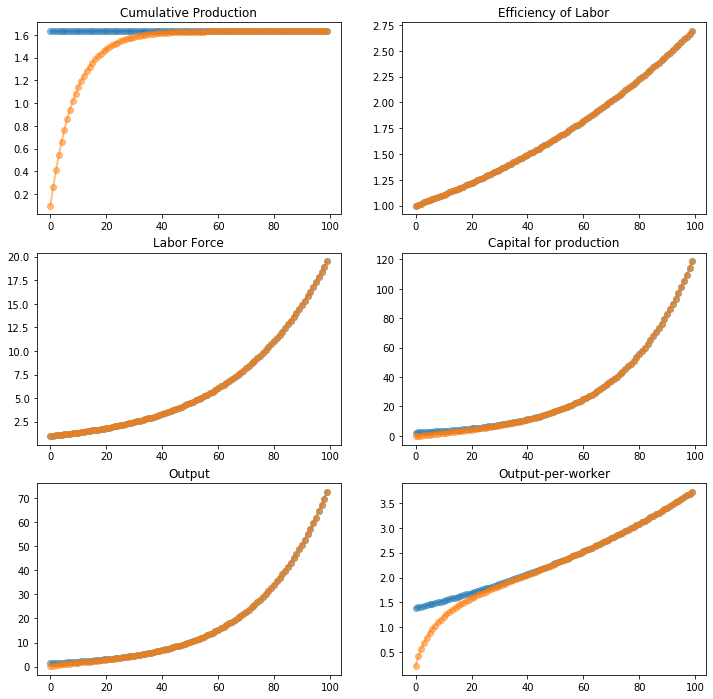

In [20]:
T = 100

s_base = Solow(κ=1.63)
s_base.scenario = "base scenario"
s_alt = Solow(κ=0.1)
s_alt.scenario = "alt scenario"

figcontents = {
        (0,0):('κ','Cumulative Production'),
        (0,1):('E','Efficiency of Labor'),
        (1,0):('L','Labor Force'),
        (1,1):('K','Capital for production'),
        (2,0):('Y','Output'),
        (2,1):('y','Output-per-worker')
       }

num_rows, num_cols = 3,2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
for i in range(num_rows):
    for j in range(num_cols):
        for s in s_base, s_alt:
            lb = f'{s.scenario}: initial κ = {s.initdata["κ"]}'
            axes[i,j].plot(s.generate_sequence(T, var = figcontents[i,j][0]),'o-', lw=2, alpha=0.5, label=lb)
            axes[i,j].set(title=figcontents[i,j][1])

#   global legend '''

There needs to be more of an understanding on each of the features for the variables. However, each of the graphs take two base features and compare the variables to the cumulative factor production. The 2nd graph is Total proppant and fluid, while the 3rd graph is taking all the fetures like total propp, fluid, lateral length, etc that were put into the formula for comparison.

In [2]:
'''Future Work: Factor in Time and Cost if possible. Also, you could maybe change the axis labels, or at least show which features relate to which features in the formula for the Solow model'''

'Future Work: Factor in Time and Cost if possible. Also, you could maybe change the axis labels, or at least show which features relate to which features in the formula for the Solow model'

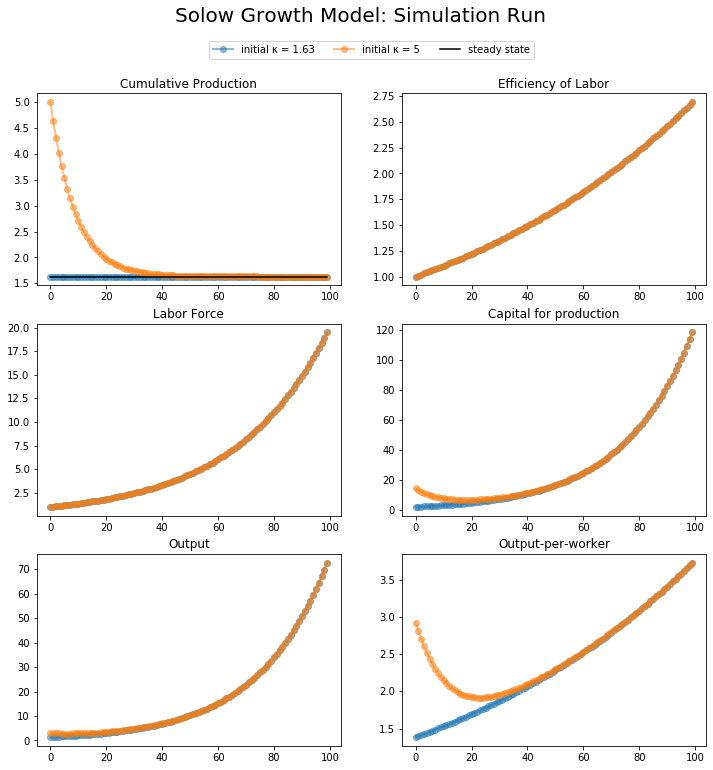

In [25]:
s_base = Solow(κ=1.63)
s_alt = Solow(κ=5)

# reproduce plots
num_rows, num_cols = 3,2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
for s in s_base, s_alt:
    for i in range(num_rows):
        for j in range(num_cols):
            lb = f'initial κ = {s.initdata["κ"]}'
            axes[i,j].plot(s.generate_sequence(T, var = figcontents[i,j][0]),'o-', lw=2, alpha=0.5, label=lb)
            axes[i,j].set(title=figcontents[i,j][1])

#   add steady state to capital output        
axes[(0,0)].plot([s_base.steady_state()]*T, 'k-', label='steady state')

#   global legend
axes[(0,0)].legend(loc='upper center', bbox_to_anchor=(1.1,1.3),ncol=3)

plt.suptitle('Solow Growth Model: Simulation Run', size = 20)
plt.show() 

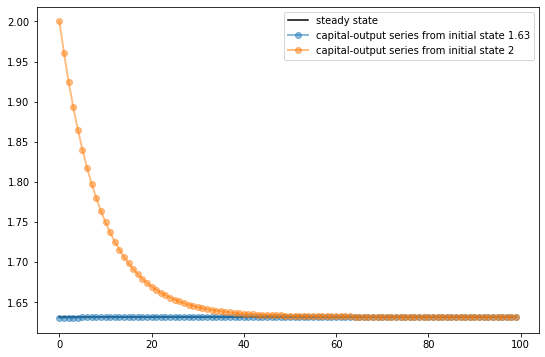

In [27]:
T = 100

s_base = Solow(κ=1.63)
s_alt = Solow(κ=2)

fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady-state value of the capital-output ratio
ax.plot([s_base.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s_base, s_alt:
    lb = f'capital-output series from initial state {s.initdata["κ"]}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.5, label=lb)
    

ax.legend()
plt.show()

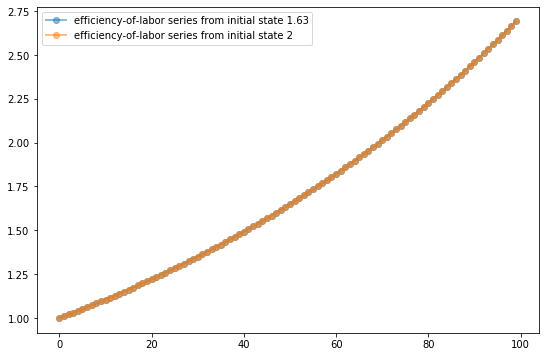

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))

# Plot time series for each economy
for s in s_base, s_alt:
    lb = f'efficiency-of-labor series from initial state {s.initdata["κ"]}'
    ax.plot(s.generate_sequence(T, var='E'), 'o-', lw=2, alpha=0.5, label=lb)
    

ax.legend()
plt.show()

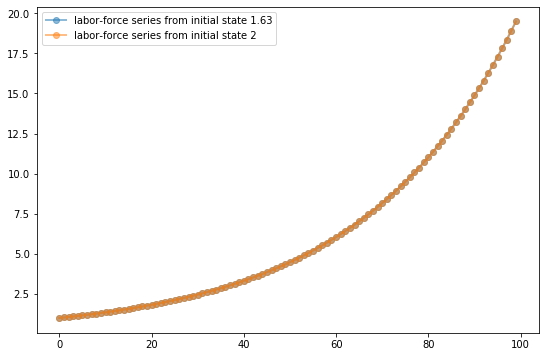

In [29]:
fig, ax = plt.subplots(figsize=(9, 6))

# Plot time series for each economy
for s in s_base, s_alt:
    lb = f'labor-force series from initial state {s.initdata["κ"]}'
    ax.plot(s.generate_sequence(T, var = 'L'), 'o-', lw=2, alpha=0.5, label=lb)
    
ax.legend()
plt.show()

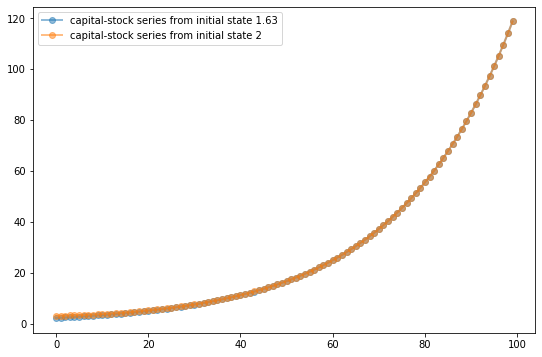

In [30]:
fig, ax = plt.subplots(figsize=(9, 6))

# Plot time series for each economy
for s in s_base, s_alt:
    lb = f'capital-stock series from initial state {s.initdata["κ"]}'
    ax.plot(s.generate_sequence(T, var = 'K'), 'o-', lw=2, alpha=0.5, label=lb)
    

ax.legend()
plt.show()

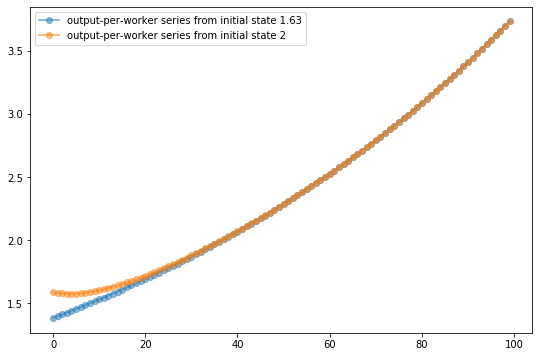

In [31]:
fig, ax = plt.subplots(figsize=(9, 6))

for s in s_base, s_alt:
    lb = f'output-per-worker series from initial state {s.initdata["κ"]}'
    ax.plot(s.generate_sequence(T, var = 'y'), 'o-', lw=2, alpha=0.5, label=lb)
ax.legend()

plt.show()